<a href="https://colab.research.google.com/github/RanveerVaru/Digit-Recognition-CNN/blob/main/DigitRecognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


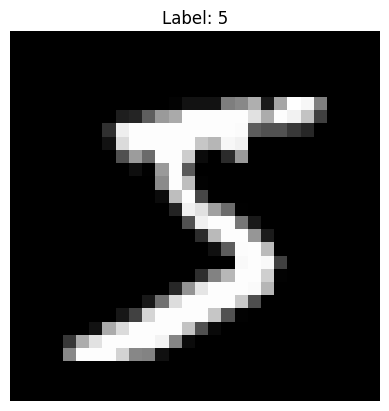

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Reshape (28x28) to (28, 28, 1) → CNN expects 3D input
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3, 3), activation='relu'),  # Layer 1
    MaxPooling2D((2, 2)),                                            # Layer 2
    Conv2D(64, (3, 3), activation='relu'),                           # Layer 3
    MaxPooling2D((2, 2)),                                            # Layer 4
    Flatten(),                                                       # Layer 5
    Dense(128, activation='relu'),                                   # Layer 6
    Dense(10, activation='softmax')                                  # Output layer
])

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8857 - loss: 0.3897 - val_accuracy: 0.9860 - val_loss: 0.0492
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9836 - loss: 0.0532 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9886 - loss: 0.0353 - val_accuracy: 0.9877 - val_loss: 0.0428
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy: 0.9917 - val_loss: 0.0334


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9876 - loss: 0.0381
Test Accuracy: 99.04%


In [10]:
import numpy as np

# Predict one image
pred = model.predict(X_test[:1])
print("Predicted Label:", np.argmax(pred[0]))
print("Actual Label:", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
Predicted Label: 7
Actual Label: 7
